# Data Exploration

The data were collected in two secondary schools in the Alentejo region of Portugal, using school reports and questionnaires. The data were cleaned to only include students for which all the variables are known - and a further 111 students were discarded because of mismatched information between the surveys and the school reports. The data come with a file containing attribute information, which is described as follows:

#### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1. school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. sex - student's sex (binary: "F" - female or "M" - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: "U" - urban or "R" - rural)
5. famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. guardian - student's guardian (nominal: "mother", "father" or "other")
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - 1+ hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - 10+ hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - first period grade (numeric: from 0 to 20) (Math or Portuguese)
31. G2 - second period grade (numeric: from 0 to 20) (Math or Portuguese)
32. G3 - final grade (numeric: from 0 to 20, output target) (Math or Portuguese)

Many of these variables will come in handy when attempting to control for ability. For example, age and parental education status are often valuable in estimating ability. The data include three variables for grades, but in our analysis we will only use `G3 - final grade`. `G3` will be our dependent variable. We will not include `G1` and `G2` as independent variables because of issues with dependence that could potentially arise.

The data come in two packets, one relating to Math classes, and one to Portuguese classes. The Portuguese data has 649 observations (649 students) and the math data has 395 observations.

Let's start by looking at a couple observations.

In [2]:
# Loading the libraries we will use and setting global options

# Suppressing warnings
import warnings
warnings.simplefilter(action = "ignore")

# Data manipulation and math/stats functions
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import statsmodels.api as sm
from linearmodels.iv import IV2SLS 

# Plotting preferences
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

# Import self-made functions
from p3functions import *

In [3]:
# Importing the data
student_por = pd.read_table('data/student-por.csv', sep = ';')
student_mat = pd.read_table('data/student-mat.csv', sep = ';')

# Differentiating the courses
student_por['course'] = 'portuguese'
student_mat['course'] = 'mathematics'

# Merging the two datasets
student_perf = pd.concat([student_por, student_mat])

# Looking at the first five observations
student_perf.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


Now that we know that our data were read in correctly, lets look at some summary statistics and visualizations of the quantative variables in our data.

In [4]:
# Brief tabular summary of descriptive statistics of the quantatative data
student_perf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
Medu,1044.0,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
traveltime,1044.0,1.522989,0.731727,1.0,1.0,1.0,2.0,4.0
studytime,1044.0,1.970307,0.834353,1.0,1.0,2.0,2.0,4.0
failures,1044.0,0.264368,0.656142,0.0,0.0,0.0,0.0,3.0
famrel,1044.0,3.935824,0.933401,1.0,4.0,4.0,5.0,5.0
freetime,1044.0,3.201149,1.031507,1.0,3.0,3.0,4.0,5.0
goout,1044.0,3.156130,1.152575,1.0,2.0,3.0,4.0,5.0
Dalc,1044.0,1.494253,0.911714,1.0,1.0,1.0,2.0,5.0


In [5]:
# Two-way frequency table of traveltime to reason
two_way(student_perf, 'traveltime', 'reason')

,course,home,other,reputation
1,234,177,59,153
2,136,69,34,81
3,43,7,13,14
4,17,5,2,0


Since "close to home" is among the reasons students may choose to take a course, it follows that 'traveltime' and 'reason' may have some relationship. The above two-way frequency displays the number of students in each pair of categories. This table shows that 49 people stated they had picked the school because of its proximity to home and that they had a commute time greater than 15 minutes. We may use this subset as an artificial instrument in our eventual analysis (see `model_fitting_2.ipynb`.

## Visualizations

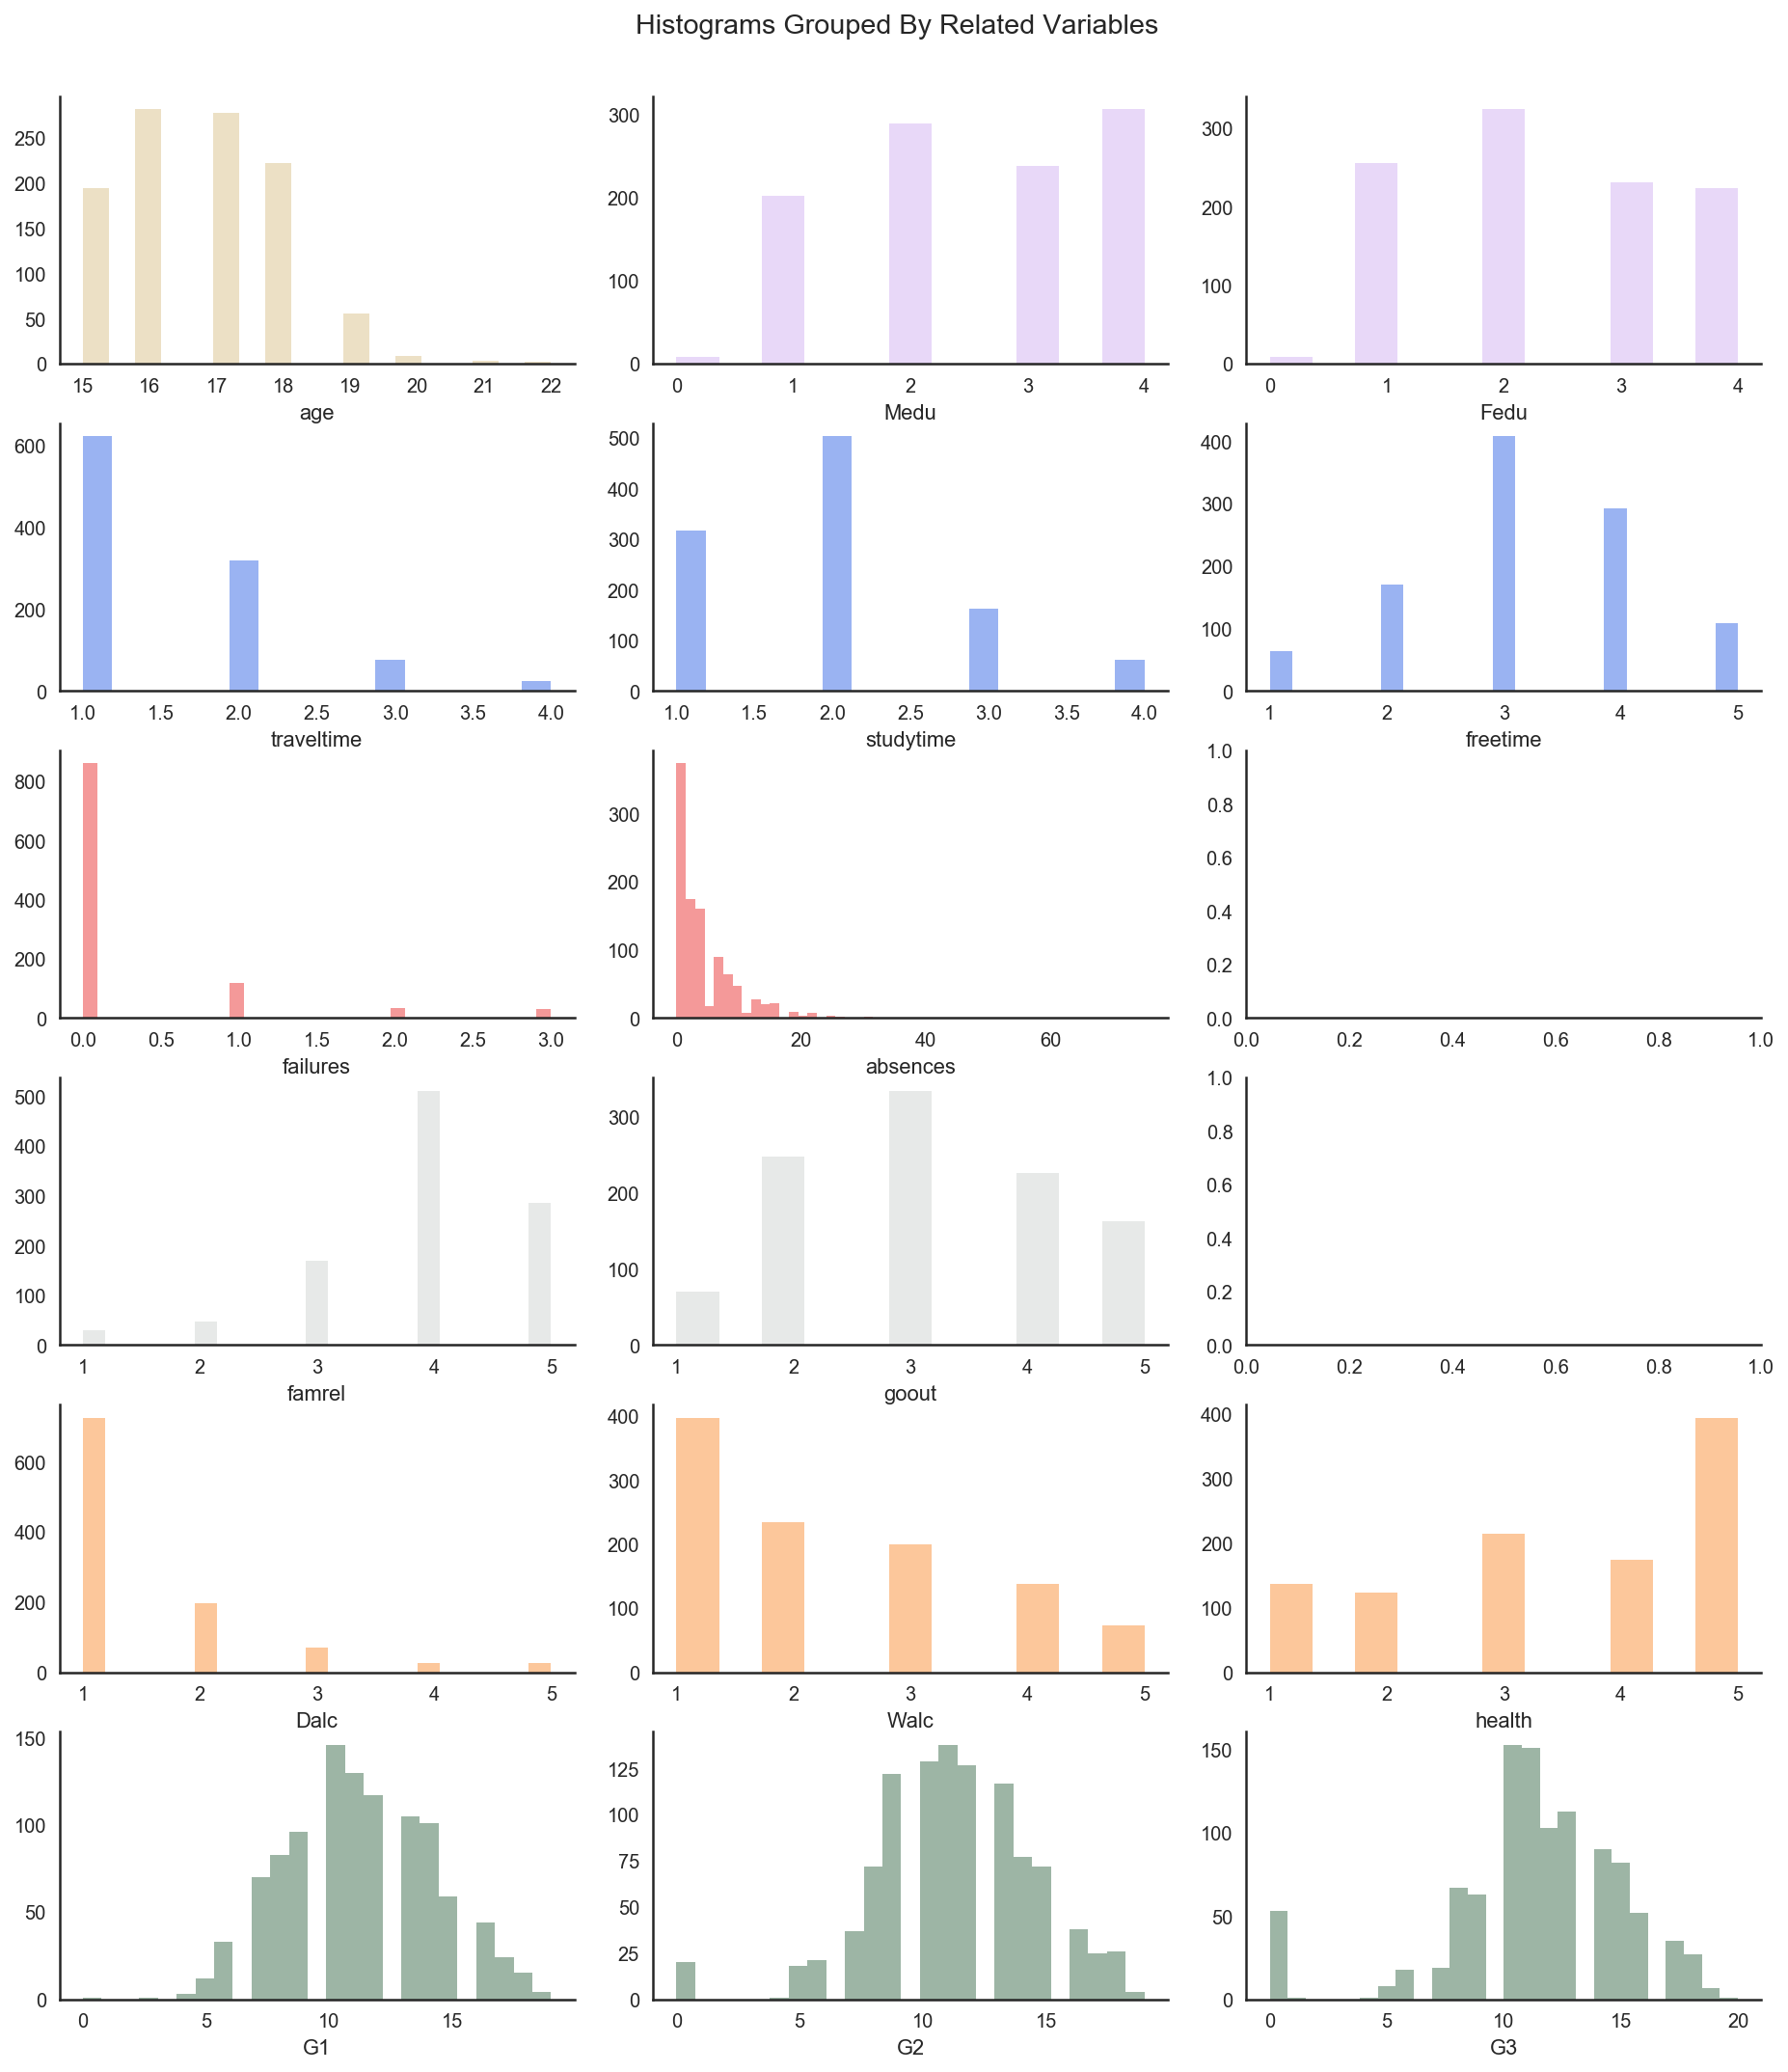

In [18]:
# Plotting histogram of quantitative variables
# Similar variables grouped by color (e.g.: mother's and father's education)
colors = {
    'age': 'tan',
    'Medu': 'lavender',
    'Fedu': 'lavender',
    'traveltime': 'blue',
    'studytime': 'blue',
    'freetime': 'blue',
    'failures': 'red',
    'absences': 'red',
    'famrel': 'silver',
    'goout': 'silver',
    'Dalc': 'orange',
    'Walc': 'orange',
    'health': 'orange',
    'G1': 'pine green',
    'G2': 'pine green',
    'G3': 'pine green'
}
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(6, 3, figsize=(13, 15), sharex=False)
f.tight_layout()
f.subplots_adjust(top=0.94)
f.suptitle('Histograms Grouped By Related Variables')

sns.despine()
r = 0
c = 0
for k,v in colors.items():
    sns.distplot(student_perf[k], kde=False, color=sns.xkcd_rgb[v], ax=axes[r,c])
    if c < 2 and k not in ['absences', 'goout']:
        c += 1
    else:
        r += 1
        c = 0

f.savefig('fig/quantvar_hist.png', bbox_inches='tight');

While these histograms give us some information about the distributions of these individual variables, they don't help with understanding how these variables interact with our dependent variable `G3`. So lets look at some violin plots to visualize some of these interactions. 

For the violin plots we split `G3` into 5 bins to more clearly visualize the interactions.
We also show the distributions relative to which school the students come from to determine whether there is a difference in the two schools. We first show the full dataset, and then limit to each course of study.

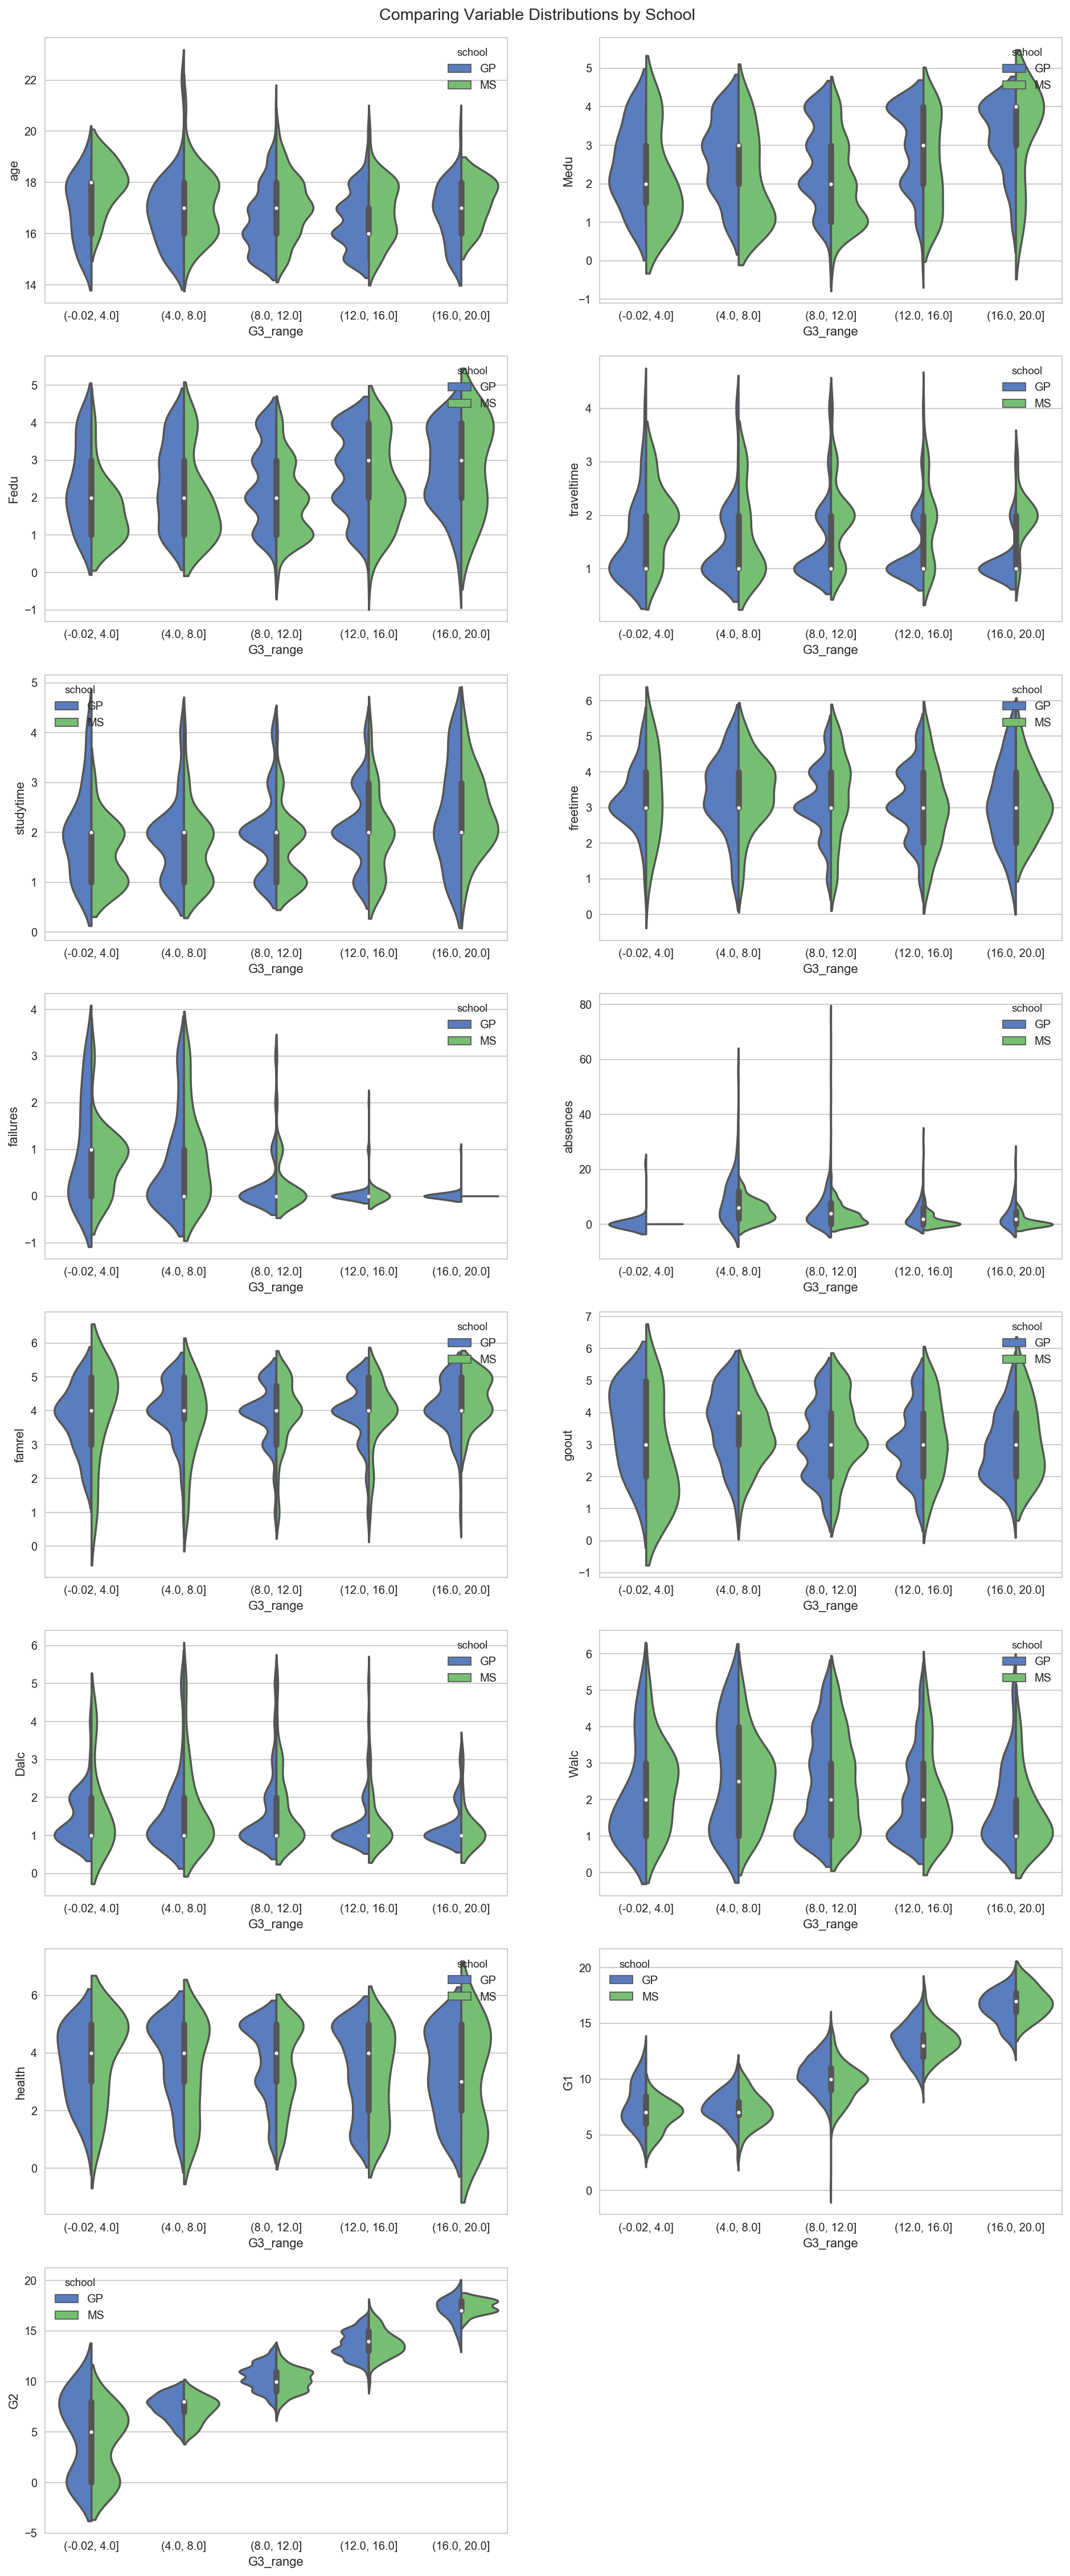

In [13]:
# Splitting G3 into ranges to get a cleaner visual
student_perf['G3_range'] = pd.cut(student_perf.G3, 5, retbins = True)[0]

# Creating the plots
plt.figure(figsize=(16, 36))
sns.set(style="whitegrid", palette="muted", color_codes=True)

plt.subplots_adjust(top=0.97)
plt.suptitle('Comparing Variable Distributions by School')

sns.despine()
for column_index, column in enumerate(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'freetime', 'failures', 
                                       'absences', 'famrel', 'goout', 'Dalc', 'Walc', 'health', 'G1', 'G2']):
    if column == 'G3_range':
        continue
    plt.subplot(8, 2, column_index + 1)
    sns.violinplot(x='G3_range', y=column, hue = 'school', split = True, data=student_perf)
    
plt.savefig('fig/distrbyschool.png', bbox_inches='tight');

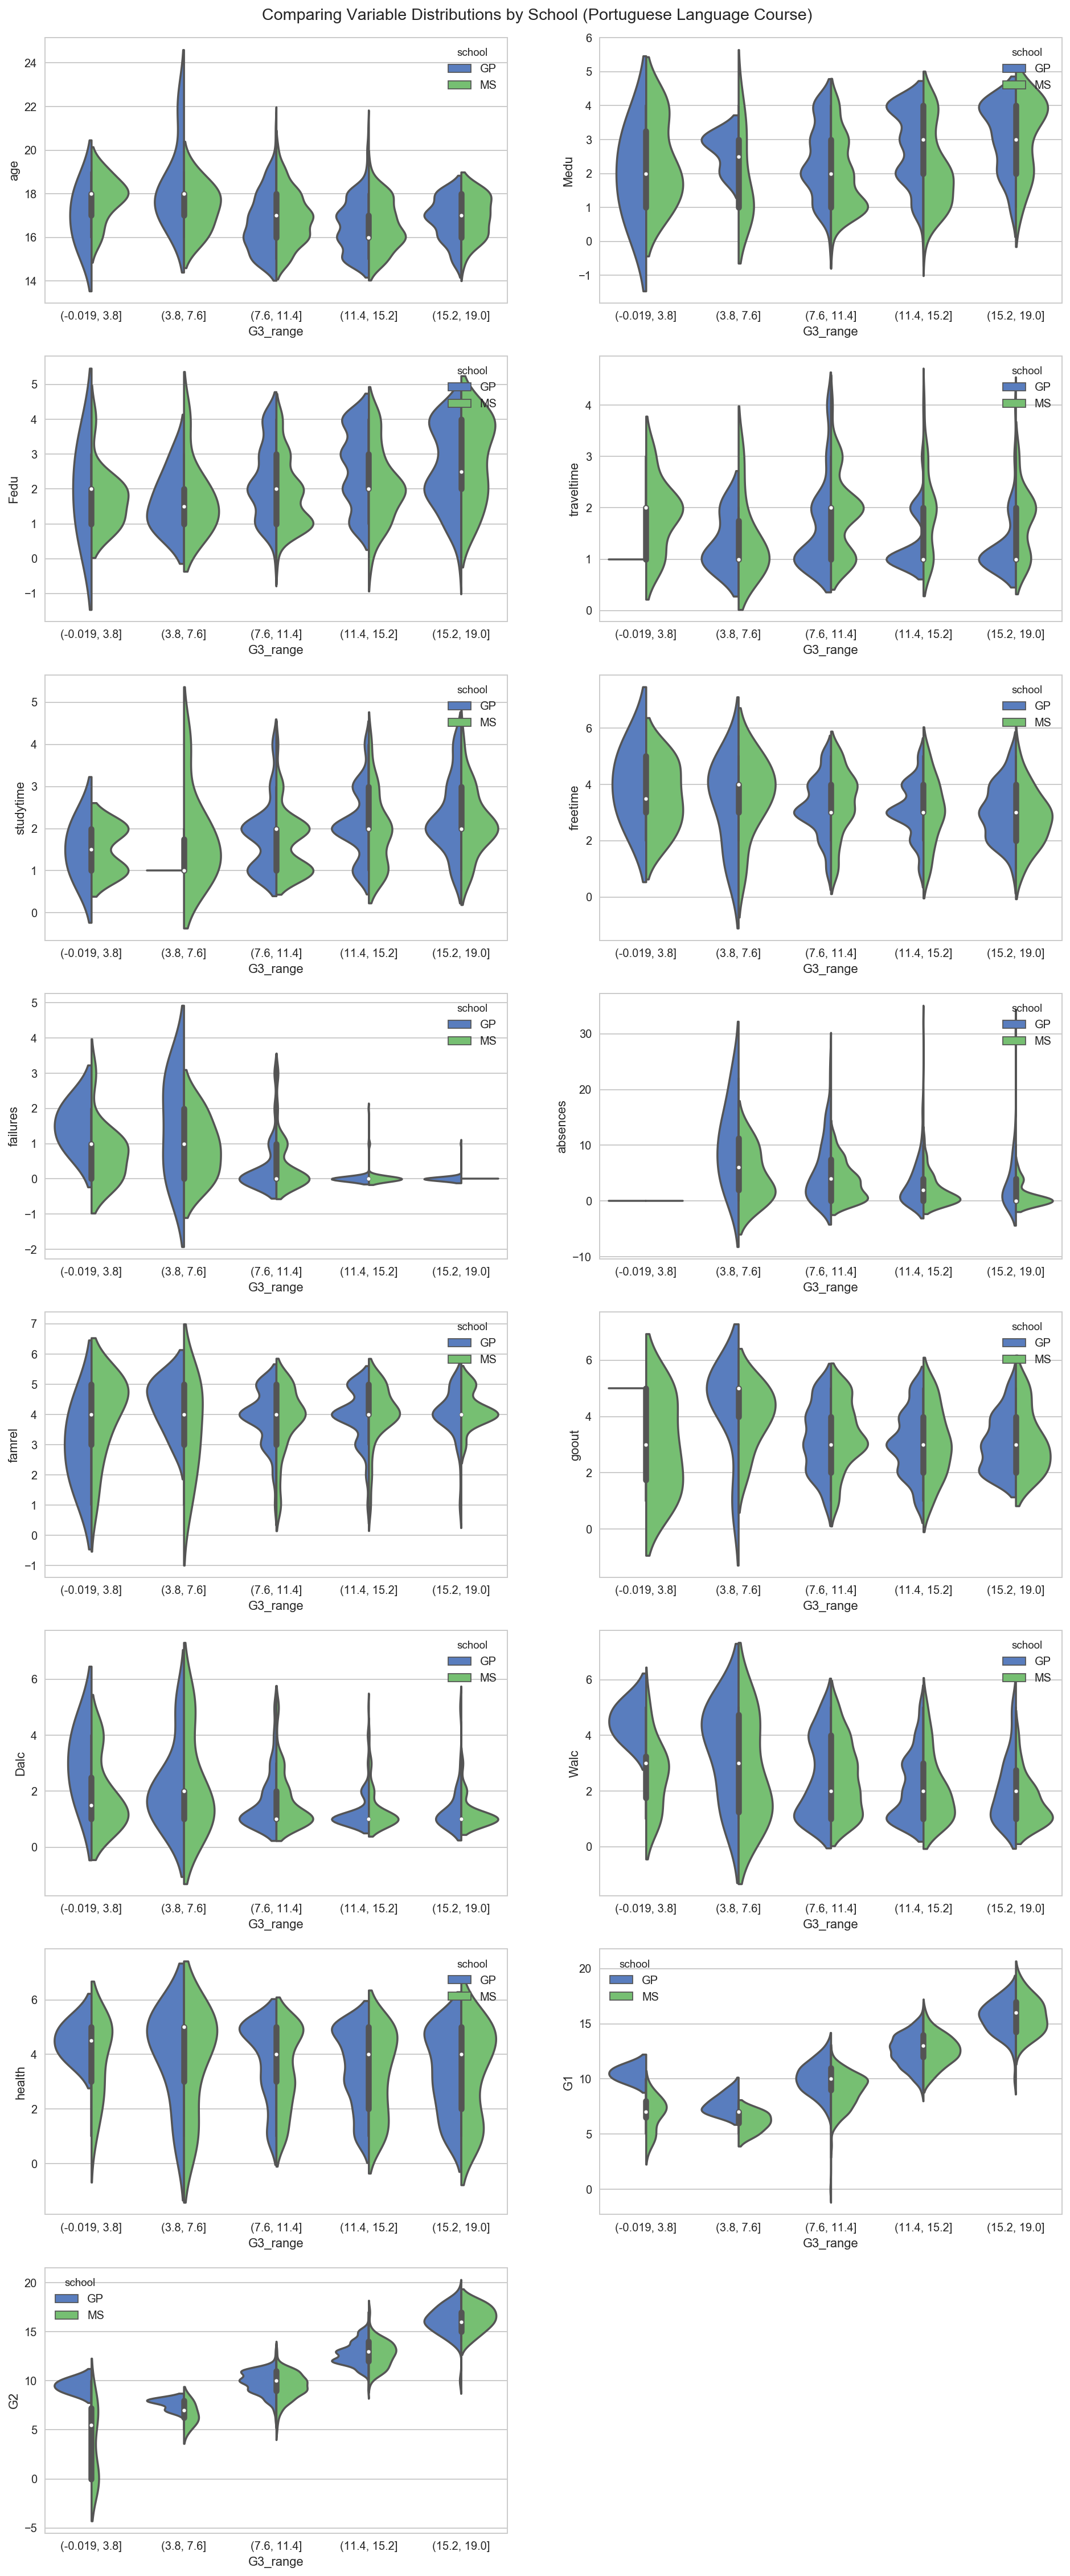

In [11]:
## Portuguese Course

# Splitting G3 into ranges to get a cleaner visual
student_por['G3_range'] = pd.cut(student_por.G3, 5, retbins = True)[0]

# Creating the plots
plt.figure(figsize=(16, 36))
sns.set(style="whitegrid", palette="muted", color_codes=True)

plt.subplots_adjust(top=0.97)
plt.suptitle('Comparing Variable Distributions by School (Portuguese Language Course)')

sns.despine()
for column_index, column in enumerate(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'freetime', 'failures', 
                                       'absences', 'famrel', 'goout', 'Dalc', 'Walc', 'health', 'G1', 'G2']):
    if column == 'G3_range':
        continue
    plt.subplot(8, 2, column_index + 1)
    sns.violinplot(x='G3_range', y=column, hue = 'school', split = True, data=student_por)
    
plt.savefig('fig/distrbyschool_por.png', bbox_inches='tight');

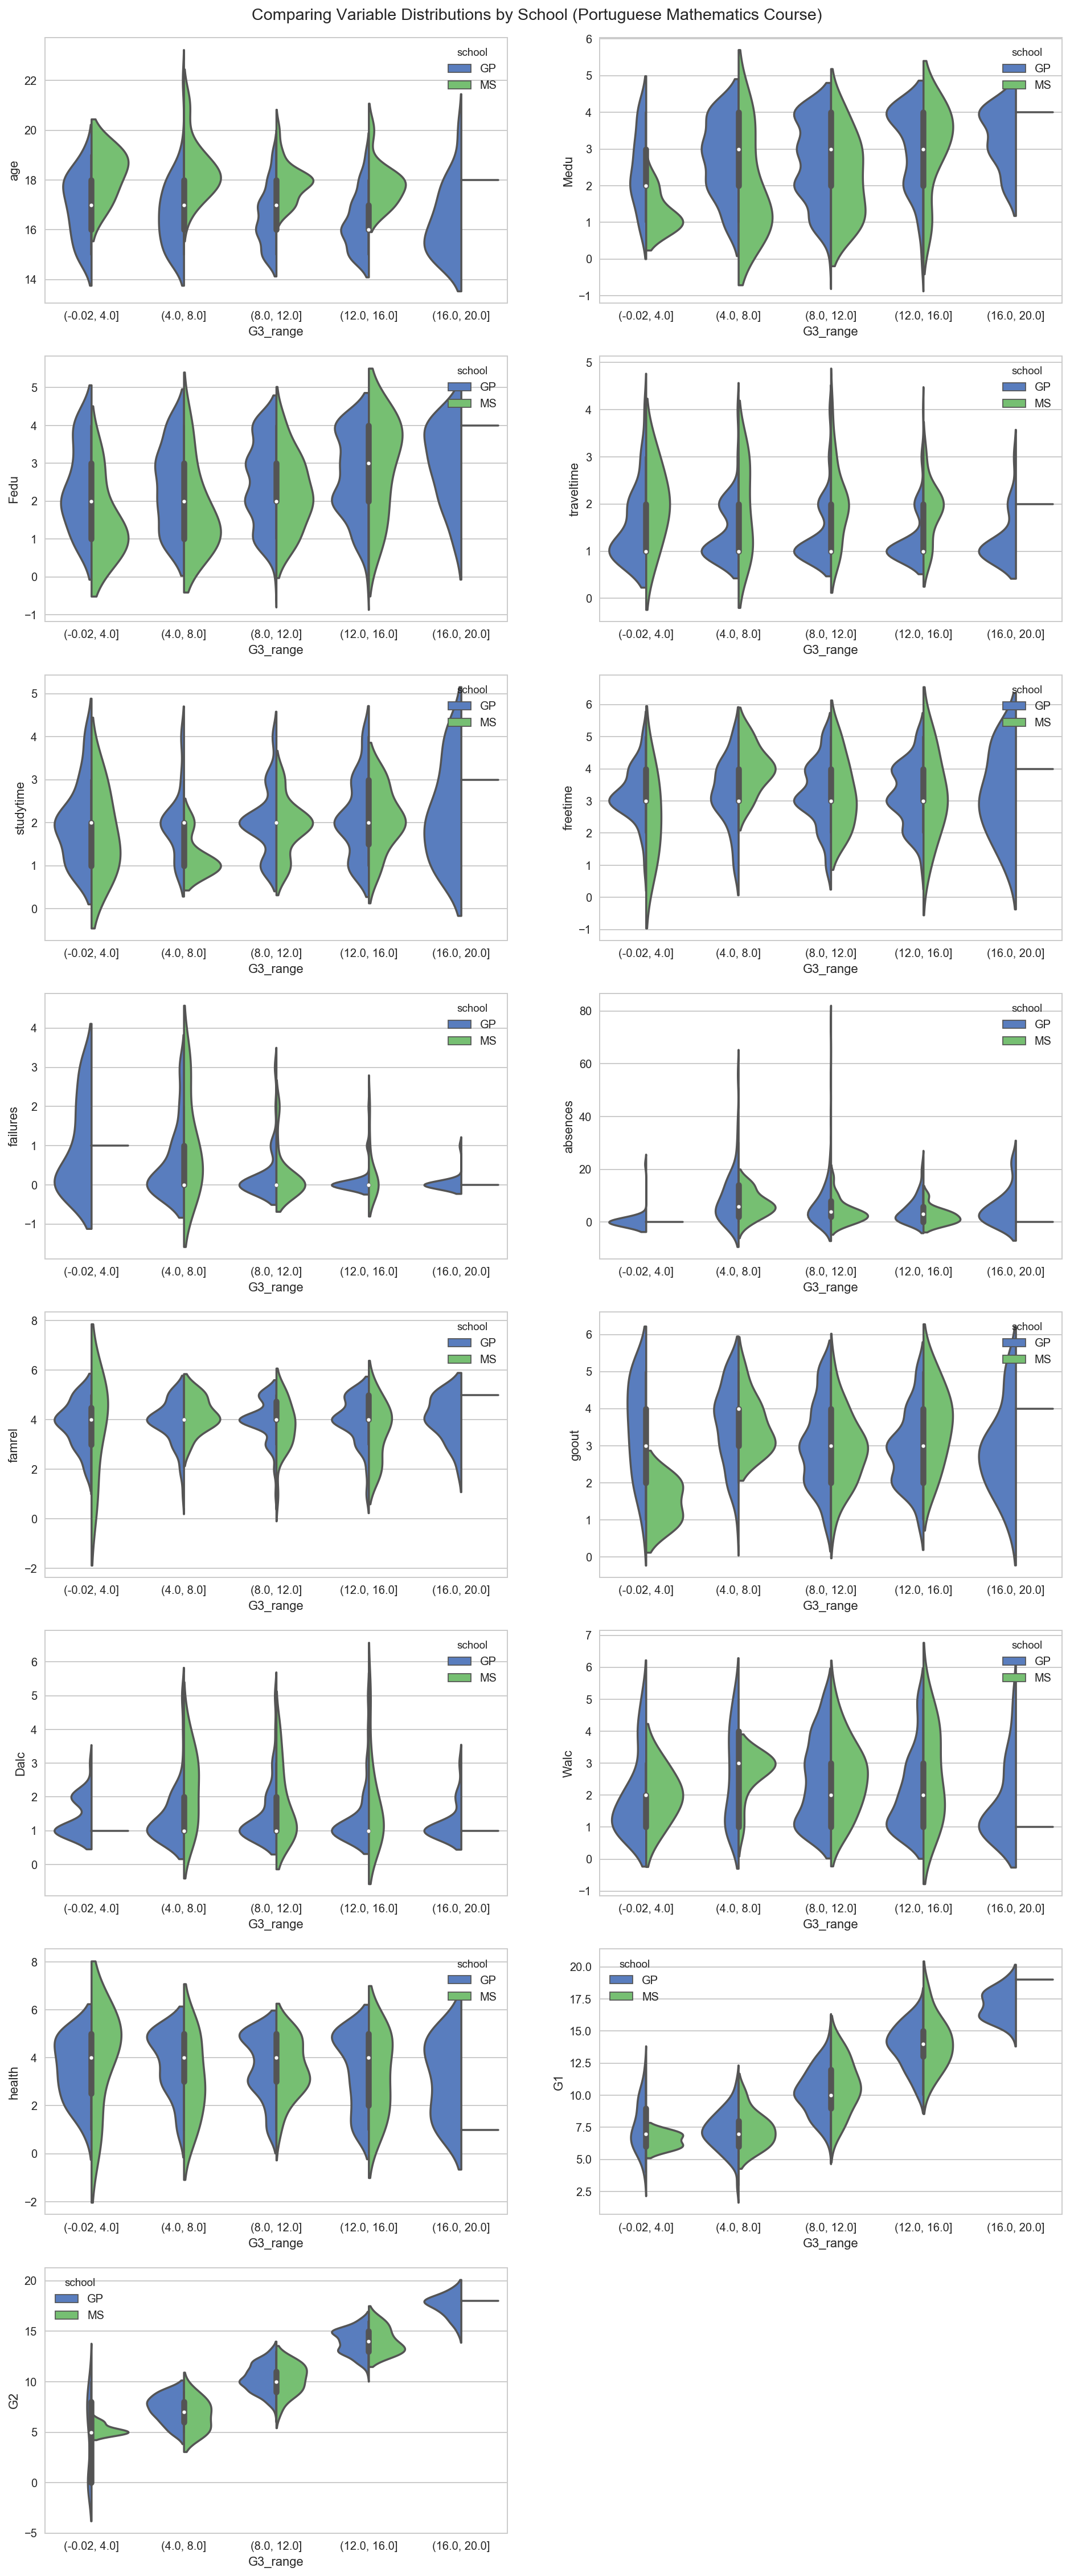

In [12]:
## Mathematics Course

# Splitting G3 into ranges to get a cleaner visual
student_mat['G3_range'] = pd.cut(student_mat.G3, 5, retbins = True)[0]

# Creating the plots
plt.figure(figsize=(16, 36))
sns.set(style="whitegrid", palette="muted", color_codes=True)

plt.subplots_adjust(top=0.97)
plt.suptitle('Comparing Variable Distributions by School (Portuguese Mathematics Course)')

sns.despine()
for column_index, column in enumerate(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'freetime', 'failures', 
                                       'absences', 'famrel', 'goout', 'Dalc', 'Walc', 'health', 'G1', 'G2']):
    if column == 'G3_range':
        continue
    plt.subplot(8, 2, column_index + 1)
    sns.violinplot(x='G3_range', y=column, hue = 'school', split = True, data=student_mat)
    
plt.savefig('fig/distrbyschool_math.png', bbox_inches='tight');

It is reassuring to see that the distributions for the two different high schools are somewhat close in most of the plots. The differences in distributions can be explained by the fact that in Portugal, high schools are concentrated in a particular subject (ie. theater, math, etc.) 

Note that `G1` and `G2` are very predictive of `G3`, which strengthens the idea that we should not include them as covariates (because they would drown out study time and are partly determined by study time).

## Mapping Studytime

The data includes a variable `studytime` which describes the student's self-reported estimate of the number of hours they spend studying each week. It is reported as a categorical variable with 4 levels:

|`studytime`|Weekly Studying|
|-----------|-------|
|1|0-2 hours|
|2|2-5 hours|
|3|5-10 hours|
|4|10+ hours|

In order to include this as a predictor for which the coefficient is correctly interpretable, we need to somehow map this to a more friendly format. We can either split up `studytime` into 4 binary indicators (this would allow for nonlinear relationships in a least squares analysis), or we can map it to a continuous variable based on the medians of each group. The main issue with the second approach is that we do not have a good idea of the distributions within each group, nor do we have an upper limit on the number of hours studied in the 4'th group.  
Before creating both of these mappings, we can look at a frequency table to see a rough distribution of the student's study times.

In [14]:
# Frequency table of study time groups
student_perf.studytime.value_counts().sort_index()

1    317
2    503
3    162
4     62
Name: studytime, dtype: int64

We see that there are only 35 students who report studying 10 or more hours each week. Given the age of the students, it seems reasonable to assume that most of them are studying no more than 20 hours a week, so for constructing our continuous map of `studytime`, let us assume that the range for the 4'th group is 10-20 hours.

In [15]:
# Constructing the continuous map for studytime
student_perf['studytime_continuous'] = 1*(student_perf.studytime == 1) + 3.5*(student_perf.studytime == 2) + 7.5*(student_perf.studytime == 3) + 15*(student_perf.studytime == 4)

# Constructing discrete map for studytime
student_perf['studytime_dscr1'] = 1*(student_perf.studytime == 1)
student_perf['studytime_dscr2'] = 1*(student_perf.studytime == 2)
student_perf['studytime_dscr3'] = 1*(student_perf.studytime == 3)
student_perf['studytime_dscr4'] = 1*(student_perf.studytime == 4)

In [16]:
# Saving the pandas dataframe
student_perf.to_pickle('data/student_por_v2.pkl')